# Laplace Equation

**강좌**: *기초 전산유체역학*

## Laplace Equation
Laplace Equation은 비압축성, 비회전류 유동에서 정상상태일 때 Velocity Potential 또는 Streamfunction의 해이다.

$$
\nabla^2 u = 0.
$$

간단한 예제로 Heat Conduction에 의해 Steady State에 도달하는 경우를 생각하자

예를 들면, 윗면에 온도만 300도이고 나머지 면의 온도가 100도인 경우 최종적으로 2차원 공간 내 온도 분포는 Laplace Equation으로 구할 수 있다.

$[0,1]^2$ 공간에 대해 수식으로 표현하면 다음과 같다.

$$
-k (T_{xx} + T_{yy}) = 0\\
T(x,1) = 300, T(x, 0) = T(0, y) = T(1, y) = 100
$$

편의상 $k=1$ 로 생각한다.

### Finite Difference Method
그림과 같이 계산 영역을 x, y 각 방향별로 균일하게 나누어서 생각하자.

:::{figure-md} Grid
<img src="figures/2d_fd_grid.png">

Grid
:::

이 경우 2차원 Array는 각 격자점의 해와 부합한다.

각 방향별 편미분을 2차 정확도 Central Difference로 표현하면 다음과 같다.

$$
\frac {T_{i+1,j} -2 T_{i,j} +  T_{i-1,j}}{\Delta x^2}
+
+\frac {T_{i,j+1}^n -2 T_{i,j}^n +  T_{i,j-1}^n}{\Delta y^2}
=0
$$

$\Delta x = \Delta y = h$ 인 경우 다음과 같이 정리된다.

$$
T_{i+1,j} + T_{i,j+1} - 4 T_{i,j} + T_{i,j-1} + T_{i-1,j}
=0
$$

이를 Matrix 형태로 나타내면 다음과 같다.

$$
\left [
\begin{matrix}
-4 & 1 &   & 1 &   &   &   &   &
\\ 
 1 &-4 & 1 &   & 1 &   &   &   &
\\
   & 1 &-4 &   &   & 1 &   &   &
\\
 1 &   &   &-4 & 1 &   & 1 &   & 
\\
   & 1 &   & 1 &-4 & 1 &   & 1 & 
\\
   &   & 1 &   & 1 &-4 &   &   & 1
\\
   &   &   & 1 &   &   &-4 & 1 & 
\\
   &   &   &   & 1 &   & 1 &-4 & 1
\\
   &   &   &   &   & 1 &   & 1 &-4
\end{matrix}
\right ]
\left [
\begin{matrix}
T_{1,1} \\
T_{1,2} \\
T_{1,3} \\
T_{2,1} \\
T_{2,2} \\
T_{2,3} \\
T_{3,1} \\
T_{3,2} \\
T_{3,3} 
\end{matrix}
\right ]
=
\left [
\begin{matrix}
-T_{1,0} & -T_{0,1} \\ & -T_{0,2} \\ - T_{1,4} &-T_{0,3}  \\
-T_{2,0} & \\ 0 \\ -T_{2,4} &  \\
-T_{3,0} &-T_{4,1} \\ &-T_{4,2} \\ - T_{3,4}& -T_{4,3}
\end{matrix}
\right ]
$$

단 한번에 역행렬을 구함으로 써 모든 점에서 온도를 구할 수 있다.

다만 공간 차분 점이 늘어날수록 역행렬을 계산하는 시간이 급격하게 늘어난다.

### 예제
Laplace 행렬을 구성한 후 Linear System을 해석하시오.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

In [2]:
def laplace_op(n):
    """
    Laplace operator
    
    Parameters
    ----------
    n : integer
        size of system
        
    Returns
    -------
    a : matrix
        operator
    """
    a = np.zeros((n*n,n*n))
    
    for i in range(n):
        for j in range(n):
            if i == j:
                for l in range(n):
                    for k in range(n):
                        ii = n*i + l
                        jj = n*j + k
                        
                        if l == k:
                            a[ii, jj] = -4
                        elif abs(l-k) == 1:
                            a[ii, jj] = 1
            elif abs(i-j) == 1:
                for l in range(n):
                    for k in range(n):
                        ii = n*i + l
                        jj = n*j + k
                        
                        if l == k:
                            a[ii, jj] = 1
    return a

In [3]:
def bc(n):
    """
    Solution array with BC
    """
    x = np.zeros(n*n)
    
    for i in range(n):
        for j in range(n):
            if i == n-1:
                # Top
                x[n*i + j] -= 300
            elif i == 0:
                # Bottom
                x[n*i + j] -= 100
            if j == n-1:
                # Right
                x[n*i + j] -= 100
            elif j == 0:
                # Left
                x[n*i + j] -= 100
                
    return x

In [4]:
# Construct operator
n = 19
a = laplace_op(n)
x = bc(n)

In [5]:
# Solve
from scipy import linalg

tt = np.linalg.solve(a, x)

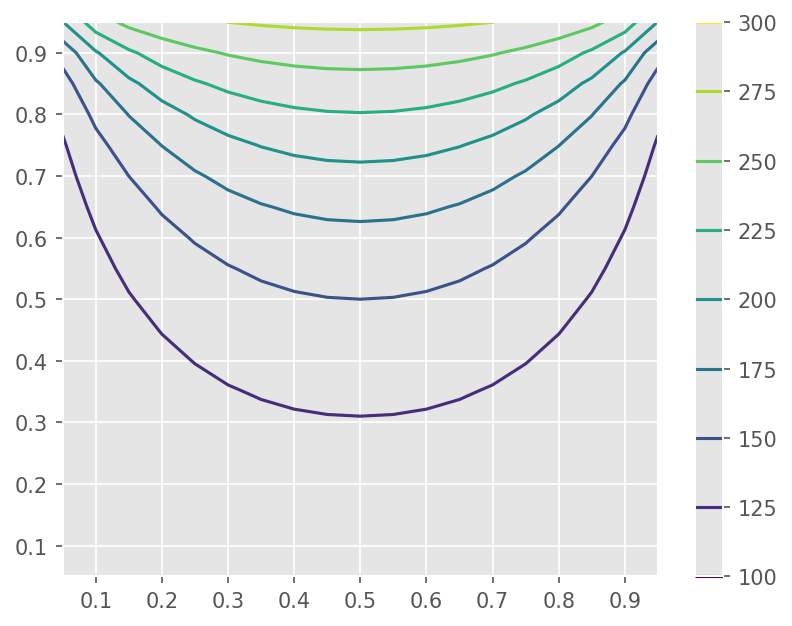

In [6]:
# Generate points (excluding BC)
xi = np.linspace(0, 1, n+2)
xx, yy = np.meshgrid(xi[1:-1], xi[1:-1])

# Plot contour
plt.contour(xx, yy, tt.reshape(n,n))
plt.colorbar()

### Computational Costs
- 선형 방정식의 계산은 Matrix-Matrix 곱 연산이다.
- Matrix 곱 연산의 계산 시간은 $O(n^3)$ 임

#### Matrix 곱셈 연산 속도 측정
* A ($m \times n$), B ($n \times l$) 곱셈 연산을 수행할 경우
   * A 행렬의 row vector와 B 행렬의 column vector 가 내적한다 
      - $a_1*b_1 + a_2*b_2$ : 2번의 곱셈 + 1번의 덧셈
      - $2n-1 \approx 2n$ 번의 연산 (덧셈 & 곱셈)
   * m 개의 Row 와 l 개의 column 에 대해 연산을 반복한다.
      - 총 $2 m \times l\times n$ 번의 연산 수행
      - $2 m \times l\times n$ Floating Points OPerations (FLOP)
      
* GEMM (General Matrix to Matrix Multiplication)
   * 대표적인 연산 속도 측정 방법
   * FLOPS : Floating Points OPerations per Second
   
* `%timeit` 함수를 이용해서 $m=n=l=4096$ 인 경우 평균 연산 시간과 FLOPS를 측정하라
   * 사용중인 CPU의 이론 성능과 비교해보자
      - https://en.wikichip.org/wiki/flops

In [ ]:
m=n=l=1024

a = np.random.rand(m, n)
b = np.random.rand(n, l)
c = np.random.rand(m, l)

t = %timeit -o c[:] = a @ b

flops = 2*m*n*l / t.average
print("Measured FLOPS : {:.4f} GFLOPS".format(flops*1e-9))

### 실습
* 위 Laplace 방정식의 격자 개수를 늘려보자. 해의 변화를 관찰하고, 계산시간의 증가를 파악하라.

* 실습 페이지의 Poisson 방정식을 해석해보자.

## Iterative Methods

### 개념
매우 큰 행렬 System $Ax=b$ 를 반복해서 푸는 방법이다.

기본 개념은 다음과 같다.
- $A = A_1 - A_2$
   - $A_1$ 은 역행렬을 쉽게 구해지는 형태이다.
   
$$
A_1 x = A_2 x + b
$$
   
- 반복되는 해를 $x^{(k)}$ 하고 이를 적용한다.

$$
A_1 x^{(k+1)} = A_2 x^{(k)}+ b
$$

- $x^{(k)} \rightarrow x$ 이면 오차 $e^{(k)} = x^{(k+1)} - x^{(k)} \rightarrow 0$ 이다. 즉 오차가 $e^{(k)}$ 감소할 때 까지 반복한다.

   - 모든 경우에 오차가 감소하지 않는다. $A_1^{-1} A_2$ 의 Eigenvalue가 모두 1 보다 작아야 한다.
   
   
### Point Jacobi Method
이 방법은 $A_1 = D$ 로 한 경우이다.

Laplace 문제에 적용하면 다음과 같이 표현할 수 있다.

$$
T_{i, j}^{(n+1)} = \frac{1}{4} \left (
T_{i+1,j}^{(n)} + T_{i,j+1}^{(n)} + T_{i,j-1}^{(n)} + T_{i-1,j}^{(n)}
\right )
$$

In [8]:
def jacobi(n, ti, dt):
    """
    Jacobi method
    
    Parameters
    ----------
    n : integer
        size
    ti : float
        current time
    dt : array
        difference
    """
    for i in range(1, n+1):
        for j in range(1, n+1):
            dt[i, j] = 0.25*(ti[i-1, j] + ti[i, j-1] + ti[i+1, j] + ti[i, j+1]) - ti[i, j]
            
def jacobi_v1(ti, dt):
    """
    Jacobi method (Vector version)
    
    Parameters
    ----------
    n : integer
        size
    ti : float
        current time
        
    Parameters
    -----------
    dt : array
        difference
    """
    dt[1:-1, 1:-1] = 0.25*(ti[:-2, 1:-1] + ti[1:-1, :-2] + ti[2:, 1:-1] + ti[1:-1, 2:]) - ti[1:-1, 1:-1]

In [9]:
n = 19
tol = 1e-5
ti = np.zeros((n+2, n+2))
dt = np.zeros((n+2, n+2))

def bc(t):
    t[-1, 1:-1] = 300
    t[0, 1:-1] = 100
    t[1:-1, -1] = 100
    t[1:-1, 0] = 100
            
err = 1
hist_jacobi = []
while err > tol:
    # Apply BC
    bc(ti)
    
    # Run Jacobi
    jacobi(n, ti, dt)
    #jacobi_v1(ti, dt)
    
    # Compute Error
    err = linalg.norm(dt) / n
    hist_jacobi.append(err)
    
    # Update solution
    ti += dt

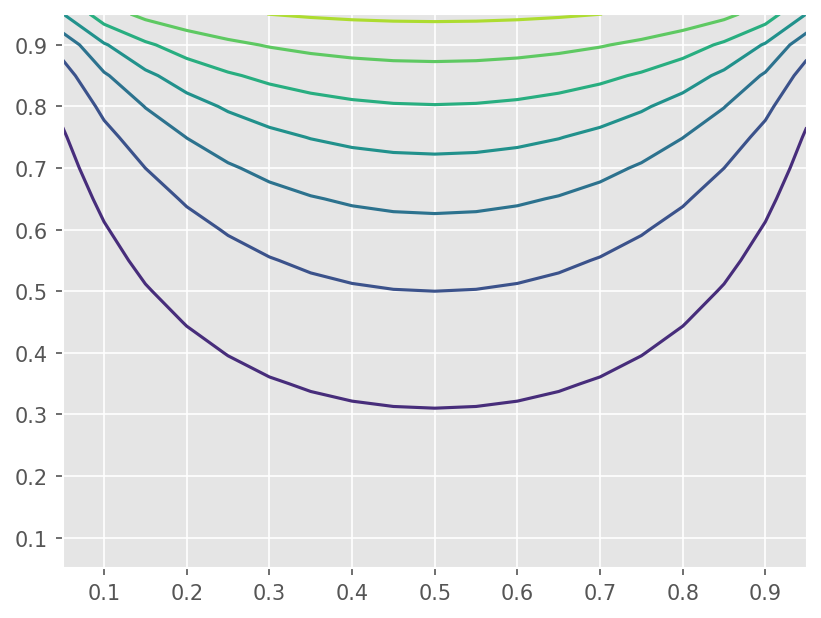

In [10]:
# Generate points (excluding BC)
xi = np.linspace(0, 1, n+2)
xx, yy = np.meshgrid(xi[1:-1], xi[1:-1])

# Plot contour
plt.contour(xx, yy, ti[1:-1, 1:-1])

### Gauss-Seidel
$A=L+D+U$ 라 생각했을 때 $A_1 = L + D$인 방법이다.

Laplace 방정식에 적용하면 다음과 같다.

$$
T_{i, j}^{(n+1)} = \frac{1}{4} \left (
T_{i-1,j}^{(n+1)} + T_{i,j-1}^{(n+1)} + T_{i,j+1}^{(n)} + T_{i+1,j}^{(n)}
\right )
$$

In [11]:
def gauss_seidel(n, ti, dt):
    """
    Gauss-Seidel method
    
    Parameters
    ----------
    n : integer
        size
    ti : float
        current time
    dt : array
        difference
    """
    for i in range(1, n+1):
        for j in range(1, n+1):
            tij = ti[i, j]
            ti[i, j] = 0.25*(ti[i-1, j] + ti[i, j-1] + ti[i+1, j] + ti[i, j+1])
            dt[i, j] = ti[i, j] - tij

In [12]:
n = 19
tol = 1e-5
ti = np.zeros((n+2, n+2))
dt = np.zeros((n+2, n+2))

def bc(t):
    t[-1, 1:-1] = 300
    t[0, 1:-1] = 100
    t[1:-1, -1] = 100
    t[1:-1, 0] = 100
            
err = 1
hist_gs = []
while err > tol:
    # Apply BC
    bc(ti)
    
    # Run Gauss-Seidel
    gauss_seidel(n, ti, dt)
    
    # Compute Error
    err = linalg.norm(dt) / n
    hist_gs.append(err)

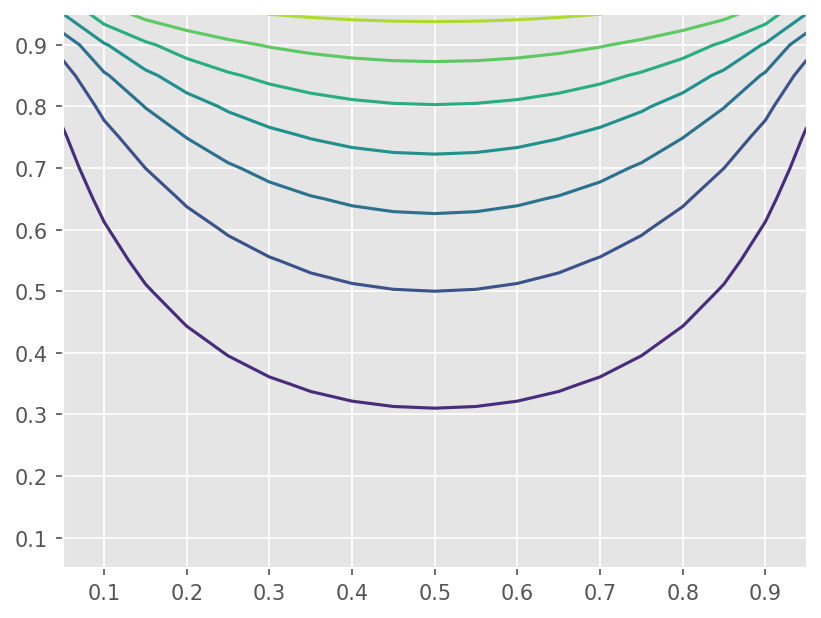

In [13]:
# Generate points (excluding BC)
xi = np.linspace(0, 1, n+2)
xx, yy = np.meshgrid(xi[1:-1], xi[1:-1])

# Plot contour
plt.contour(xx, yy, ti[1:-1, 1:-1])

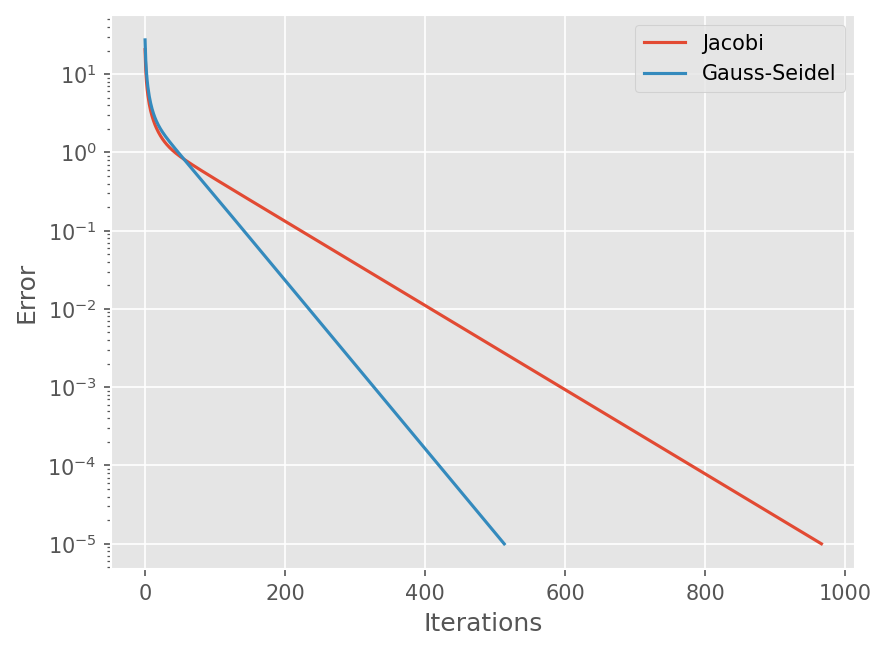

In [14]:
# Compute History
plt.semilogy(range(len(hist_jacobi)), hist_jacobi)
plt.semilogy(range(len(hist_gs)), hist_gs)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(['Jacobi', 'Gauss-Seidel'])

### 수렴 특성 비교
- 오차 벡터 $E^n$ 이라 할 때, 오차는 다음과 같이 감쇄한다.
   * $E^{n+1} = (A_1^{-1} A2) E^{n}$

- 즉 행렬 $A_1^{-1} A_2$ 의 최대 Eigenvalue에 따라 오차 감쇄율이 달라진다.

- 행렬 크기를 3~19까지 최대 Eigenvalue 구하기
    * `np.diag` : 대각 행렬 항 구함, 주어진 대각 행렬로 구성된 행렬 구함
    * `np.tril` : Lower triangle 행렬 계산
    * `linalg.inv` : 역행렬 계산
    * `linalg.eig` : 행렬의 Eigenvalue와 Eigenvector 계산

Text(0, 0.5, '$\\lambda_{max}$')

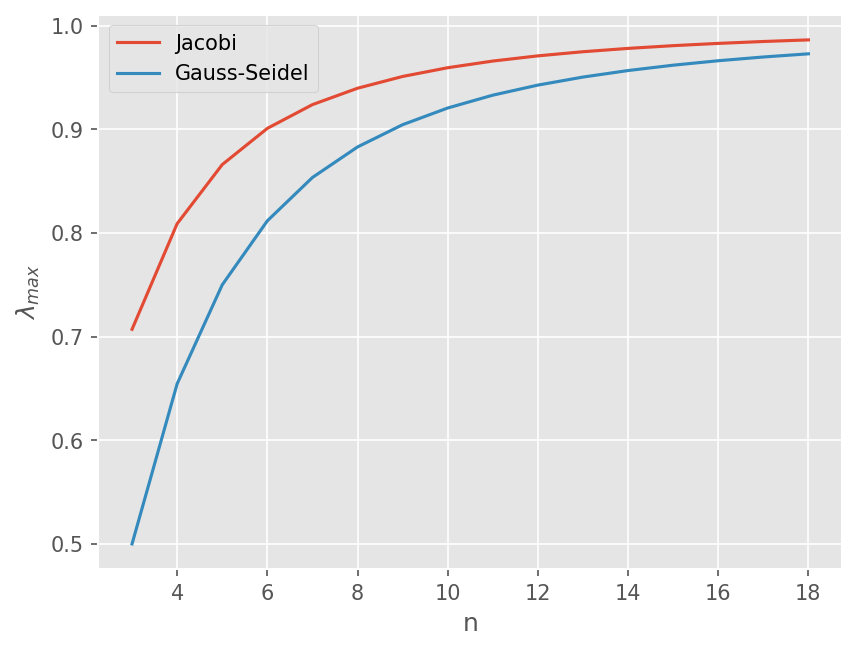

In [15]:
# 행렬의 크기
ns = range(3, 19)

# Jacobi 방법의 최대 고유치 계산
ev_jacobi = []

for n in ns:
    A = laplace_op(n)
    
    # Jacobi 방법을 행렬로 표기
    A1 = np.diag(np.diag(A))
    A2 = A - A1
    op = linalg.inv(A1) @ A2
    
    # 최대 고유치 계산
    evi = np.abs(linalg.eig(op)[0]).max()
    ev_jacobi.append(evi)

ev_gs = []

for n in ns:
    A = laplace_op(n)
    
    # Gauss-Seidel 방법을 행렬로 표기
    A1 = np.tril(A)
    A2 = A - A1
    op = linalg.inv(A1) @ A2
    
    # 최대 고유치 계산
    evi = np.abs(linalg.eig(op)[0]).max()
    ev_gs.append(evi)

plt.plot(ns, ev_jacobi)
plt.plot(ns, ev_gs)
plt.legend(['Jacobi', 'Gauss-Seidel'])
plt.xlabel('n')
plt.ylabel(r"$\lambda_{max}$")

### Succesive overelaxation (SOR)
Gauss-Seidel 결과에 relxation parameter $\omega$ 를 이용해서 계산 결과를 가속한다.

즉

$$
T_{i,j}^{(n+1)} = T_{i,j}^{(n)} + \omega \left (
\tilde{T}_{i,j}^{(n+1)} - T_{i,j}^{(n)}
\right )
$$

여기서 $\tilde{T}_{i,j}^{(n+1)}$ 은 Gauss-Seidel 결과이다.

### 실습
* SOR 방법을 구현하시오. $\omega \in (1.1, 1.8)$ 사이에서 값을 변화시키면서 수렴 속도를 비교하시오.

* Point Jacobi, Gauss Seidel, SOR 방법에 대해 격자 크기를 달리하면서 해의 변화를 관찰하고, 계산시간의 증가를 파악하라.

* 실습 페이지의 Poisson 방정식을 해석해보자.